# Application use our Poisson System



In [1]:
from src.util import *
from src.get_mask import Painter
from src.poisson_system import Poisson_system
from src.poisson_solver import sor_solver_jit
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
import cv2
# hidecode()

## Object Insertion
### 1. Seamless insert people into their idol’s picture

In [11]:
def seamless_blending(paths, gname, fname, method='dg', maskname=None,omega=1.8, show_plot=True, draw=True):
    maskname = gname.split('.')[0]+'_'+fname.split('.')[0]+'.png' if maskname is None else maskname
    if draw:
        # draw mask
        pp = Painter(g_impath=paths+gname, f_impath=paths+fname)
        pp.get_mask(maskname)
        source = cv2.cvtColor(pp.g, cv2.COLOR_BGR2RGB)
        destination = cv2.cvtColor(pp.f, cv2.COLOR_BGR2RGB)
    else:
        source = plt.imread(paths+'new_'+gname)
        destination = plt.imread(paths+fname)
        mask = plt.imread(paths+maskname)
        
    # get poisson equation
    PS = Poisson_system(source=source, destination=destination, mask=mask)
    A, b = PS.get_Ab(method=method)
    A = A.tolil()
    data = [np.array(it) for it in A.data]
    rows = [np.array(it) for it in A.rows]
    diag = A.diagonal()

    # solve poisson equation
    #x0 = PS.g[PS.mask==1]
    #x1 = sor_solver_jit(data, rows, diag, b, omega, x0=x0,eps=5e-3)
#     x1 = spsolve(A=A, b=b)
    combinel_img = PS.combine(x1)
    
    # show plot
    if show_plot:
        sourcetmp = blend(source, mask, x=np.ones_like(source) * 255)
        plt.figure(figsize=(10, 10))
        plt.subplot(2, 2, 1)
        plt.imshow(sourcetmp)
        plt.title('source')
        plt.subplot(2, 2, 2)
        plt.imshow(destination)
        plt.title('destination')
        plt.subplot(2,2,3)
        plt.imshow(blend(image=destination,mask=mask,x=source,alpha=0))
        plt.title('normal blending')
        plt.subplot(2,2,4)
        plt.imshow(combinel_img)
        plt.title('Seamless blending:'+PS.cur_method[1])
        plt.savefig(paths+maskname.split('.')[0]+'.jpg')
        plt.show()
    return combinel_img

In [12]:
paths = './data/'

Import gradient ['dg', 'import gradients', 'basic seamless cloning']


C:\Users\Lenovo\Desktop\cs283_SeamlessEditing\src\poisson_solver.py:45: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'data' of function 'my_mul'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "src\poisson_solver.py", line 62:
@jit(nopython=True, fastmath=True, parallel=True)
def my_mul(data, rows, x):
^

  err = np.linalg.norm(my_mul(data, rows, x) - b)
C:\Users\Lenovo\Desktop\cs283_SeamlessEditing\src\poisson_solver.py:45: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'rows' of function 'my_mul'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "src\poisson_solver.py", line 62:
@jit(nopython=True, 

0 9213.126521760276
50 62.17784812310076
100 35.493406280724244
150 26.1876481198352
200 21.275418167123572
250 18.21749029614468
300 16.125141027765142
350 14.595328317106528
400 13.41617823402772
450 12.467148997543452
500 11.676295520776279
550 10.99900655598667
600 10.406583301967903
650 9.879864624673237
700 9.405579911880833
750 8.974215029825707
800 8.578732545815189
850 8.213782585786927
900 7.87520115300624
950 7.559680929066499
1000 7.264548453916297
1050 6.987608917342103
1100 6.727035270161674
1150 6.481287268081694
1200 6.249051291842487
1250 6.029194937011861
1300 5.820732317374767
1350 5.622797270252205
1400 5.434622469825583
1450 5.255523007141601
1500 5.084883378378317
1550 4.922147094090165
1600 4.766808317662417
1650 4.6184050843199085
1700 4.476513758098191
1750 4.340744463578984
1800 4.210737289133709
1850 4.086159103985118
1900 3.966700866245319
1950 3.8520753258801106
2000
func:'sor_solver_jit' took: 666.7206 sec


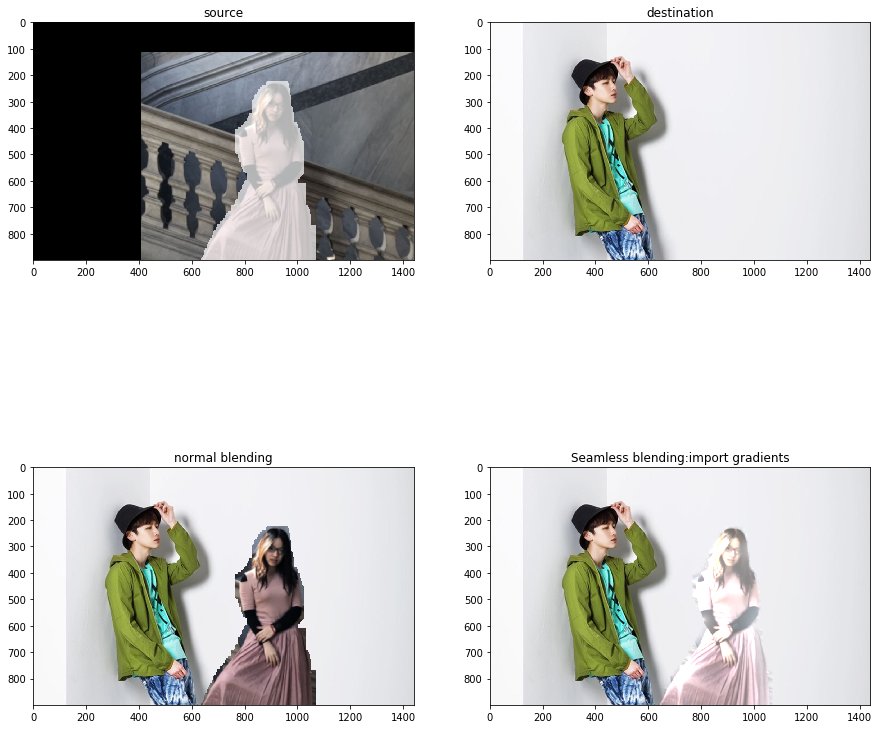

In [13]:
final_img = seamless_blending(paths,gname='kyt_duomo.jpg', fname='bjt.jpg',method='dg',draw=False)